In [ ]:
import copy 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import minimize 
import IESDS
import order_k
import BFPSNS
import Linear_programming
from scipy.optimize import minimize_scalar
import QUAD as quad

import nashpy as nash

# this module contains the data
import hst 

In [3]:
df = pd.read_csv('auction_prices.csv')
p = df.values

### 1.

In [13]:
R = 100_000 
n = 5
k = 3
win_b = []
thetas = np.linspace(1, 5, 20)
for theta in thetas:
    v = np.random.gamma(k,theta,(R, n))
    p_spsb = np.sort(v, axis=1)[:,-2]
    p_spsb = np.mean(p_spsb)
    win_b.append(p_spsb)

print(win_b)

data_mean_p = np.mean(p)
print("Mean price:", data_mean_p)

[3.669177038314017, 4.443362696065085, 5.206601472706179, 5.984142794907622, 6.762981469165628, 7.5244011671733135, 8.293063555075358, 9.084875934963865, 9.848643903256699, 10.60873271556832, 11.378351889126074, 12.177049435672476, 12.911876103623127, 13.713345939204732, 14.456317367608404, 15.262167266064612, 16.056344880197315, 16.799030875790606, 17.594953444979332, 18.349319549479812]
Mean price: 8.436091118086878


In [15]:
win_b = []
thetas = np.linspace(1, 3, 100)
for theta in thetas:
    v = np.random.gamma(k,theta,(R, n))
    p_spsb = np.sort(v, axis=1)[:,-2]
    p_spsb = np.mean(p_spsb)
    win_b.append(p_spsb)
    if data_mean_p - p_spsb < 0.01:
        print("Theta:", theta)
        close_theta = theta
        break

v = np.random.gamma(k,close_theta,(R, n))
p_spsb = np.sort(v, axis=1)[:,-2]
p_spsb = np.mean(p_spsb)
print(p_spsb)

Theta: 2.313131313131313
8.482840548176634


### 2.

C:\Users\elias\AppData\Local\Temp\ipykernel_31836\1587653496.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return v - numer/denom


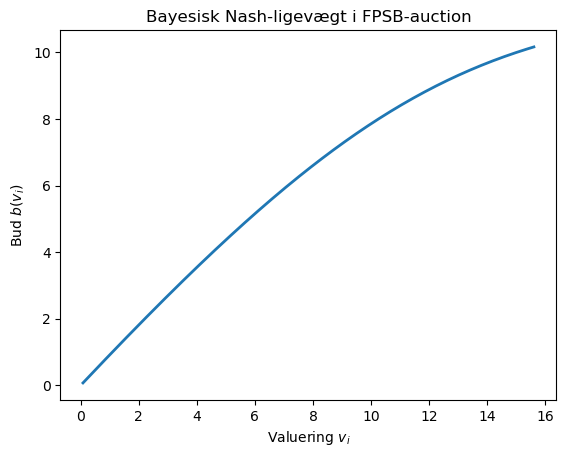

In [22]:
from scipy.stats import gamma
from scipy.integrate import quad

# k og theta er dem, du har estimeret i opgave 1
F_cdf_gamma = lambda v: gamma.cdf(v, a=k, scale=theta)

# antallet af bydere
n = 5  

# din generiske b(v)-funktion fra før:
def b(v, F_cdf, n):
    numer = quad(lambda x: F_cdf(x)**(n-1), 0, v)[0]
    denom = F_cdf(v)**(n-1)
    return v - numer/denom

# så beregner du b(v) over et grid af v-værdier
import numpy as np
import matplotlib.pyplot as plt

v_grid = np.linspace(0, np.quantile(p, 0.99), 200)   # fx fra 0 til 99%-kvantil af dine data
b_vals = [b(vi, F_cdf_gamma, n) for vi in v_grid]

plt.plot(v_grid, b_vals, lw=2)
plt.xlabel("Valuering $v_i$")
plt.ylabel("Bud $b(v_i)$")
plt.title("Bayesisk Nash-ligevægt i FPSB-auction")
plt.show()
